In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [30]:
# define protein 

proteins = {'DCV' : {
    "1A": (799, 1089),
    "2A": (1092, 1161),
    "2B": (1164, 1587),
    "2C": (1590, 2901),
    "3A": (2904, 3501),
    "3C": (3504, 4422),
    "RdRp": (4425, 6072),
    "VP2": (6267, 7110),
    "VP4": (7113, 7281),
    "VP3": (7284, 8175),
    "VP1": (8175, 8970),
}, 
            'CrPV': {
    "1A": (709, 1206),
    "2A": (1207, 1278),
    "2B": (1279, 1692),
    "2C": (1693, 2925),
    "3A": (2926, 3361),
    "3B": (3364, 3432),
    "3C": (3433, 4368),
    "RdRp": (4369, 6022),
    "VP1": (6217, 7065),
    "VP4": (7066, 7236),
    "VP2": (7237, 8121),
    "VP3": (8122, 8902),
}
           }

In [31]:
# load diveristy 

fname = "all_snpgenie_site_results.csv"
df = pd.read_csv(fname)

In [32]:
# exclude parental 

df = df[df['passage']!='parental_p0']

In [33]:
df.head()

,Unnamed: 0.1,Unnamed: 0,file,product,site,ref_nt,maj_nt,position_in_codon,overlapping_ORFs,codon_start_site,...,class_vs_ref,class,coverage,A,C,G,T,virus,rep,passage
0,0,0,results/dcv/parental_p0_vs_p0/variants/SNPGeni...,unassigned_gene_1,823,T,T,1.0,0,823.0,...,Nonsynonymous,Nonsynonymous,20834,0,6,0.0,20828.0,DCV,dcv,parental_p0_vs_p0
1,1,1,results/dcv/parental_p0_vs_p0/variants/SNPGeni...,unassigned_gene_1,927,T,T,3.0,0,925.0,...,Synonymous,Synonymous,22303,0,8,0.0,22295.0,DCV,dcv,parental_p0_vs_p0
2,2,2,results/dcv/parental_p0_vs_p0/variants/SNPGeni...,unassigned_gene_1,930,T,T,3.0,0,928.0,...,Synonymous,Synonymous,22745,0,9,0.0,22736.0,DCV,dcv,parental_p0_vs_p0
3,3,3,results/dcv/parental_p0_vs_p0/variants/SNPGeni...,unassigned_gene_1,938,A,A,2.0,0,937.0,...,Nonsynonymous,Nonsynonymous,21959,21954,0,5.0,0.0,DCV,dcv,parental_p0_vs_p0
4,4,4,results/dcv/parental_p0_vs_p0/variants/SNPGeni...,unassigned_gene_1,963,T,T,3.0,0,961.0,...,Nonsynonymous,Nonsynonymous,22673,8,0,0.0,22665.0,DCV,dcv,parental_p0_vs_p0


In [34]:
df_pis_protein = pd.DataFrame() 

for virus in ['DCV', 'CrPV']:
    for sample in df['passage'].unique():
        proteins_virus = proteins[virus]
        for protein in proteins_virus.items():
            protein_id = protein[0]
            protein_start = protein[1][0]
            protein_end = protein[1][1]
            protein_length = protein_end - protein_start

            df_temp = df[df['virus']== virus]
            df_temp = df_temp[df_temp['passage']==sample]
            df_temp = df_temp[df_temp['site'].isin(list(range(protein_start,protein_end+1 )))]
            avg_pi = df_temp['pi'].sum()/protein_length

            mean_pis = {
                        'virus': [virus], 
                        'sample': sample, 
                        'protein': protein_id,
                        'avg_pi': avg_pi, 
                    }

            df_pis_protein = pd.concat([pd.DataFrame(mean_pis),df_pis_protein], ignore_index=True)

In [35]:
df_pis_protein['genotype'] = df_pis_protein['sample'].str.split("_").str[0]
df_pis_protein['rep'] = df_pis_protein['sample'].str.split("_").str[-1]
df_pis_protein['passage'] = df_pis_protein['sample'].str.split("_").str[1].str.split("p").str[-1].astype(int)

df_pis_protein.head()

,virus,sample,protein,avg_pi,genotype,rep,passage
0,CrPV,W_p10_c,VP3,0.000278,W,c,10
1,CrPV,W_p10_c,VP2,0.000316,W,c,10
2,CrPV,W_p10_c,VP4,0.000104,W,c,10
3,CrPV,W_p10_c,VP1,0.000114,W,c,10
4,CrPV,W_p10_c,RdRp,0.000195,W,c,10


In [36]:
df_pis_protein['genotype'].unique()

array(['W', 'I', 'K', 'parental'], dtype=object)

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_56836/4076016260.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental')


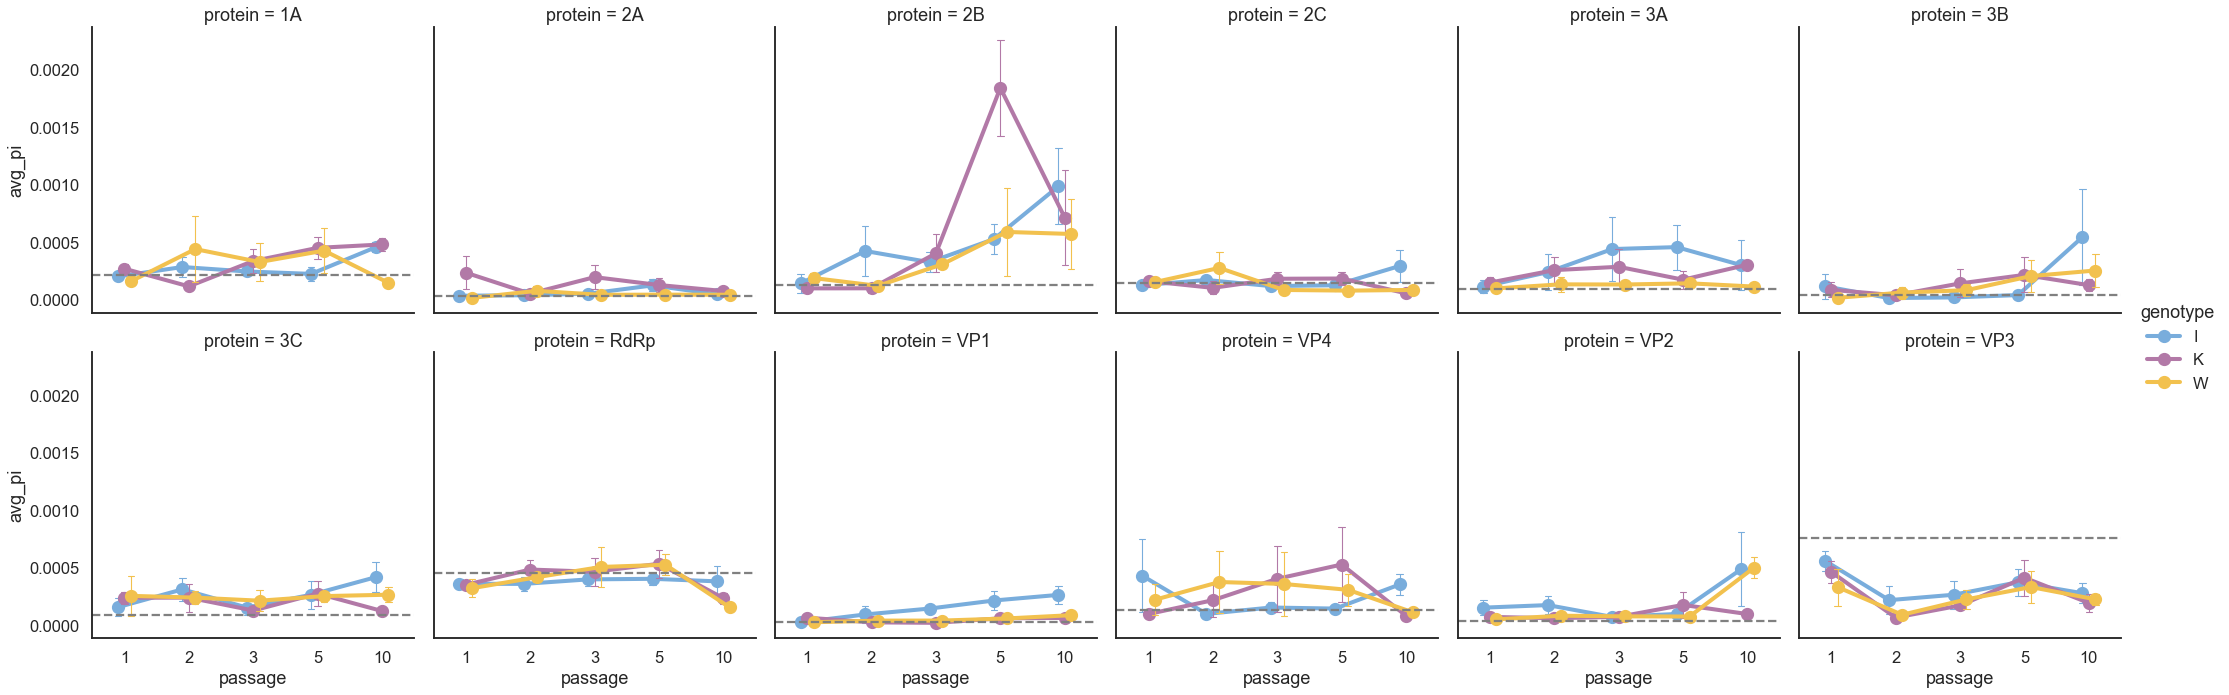

In [43]:
sns.set_context("talk") 

sns.set_style('white')

g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental') 
                               & (df_pis_protein['virus']=='CrPV')], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                col='protein', 
                palette=our_color_palette, 
                col_order = proteins['CrPV'].keys(),
                col_wrap=6, 
                errwidth=1.1, 
                errorbar="se",
                  dodge=0.2,
                  capsize=0.1,
                kind='point')


# Add a horizontal line to each plot
df_p0 = df_pis_protein[(df_pis_protein['genotype']=='parental') & (df_pis_protein['virus']=='CrPV')]
for ax in g.axes.flat:
    protein = ax.title.get_text().split("= ")[-1] 
    pi_p0 = df_p0[df_p0['protein']==protein]['avg_pi'].values[0]
    ax.axhline(y=pi_p0, color='gray', linestyle='--')

g.figure.savefig(f"/Users/lfuhrmann/Downloads/crpv_diveristy_per_proteins.pdf")

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_56836/3036660745.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental') ],


nothing


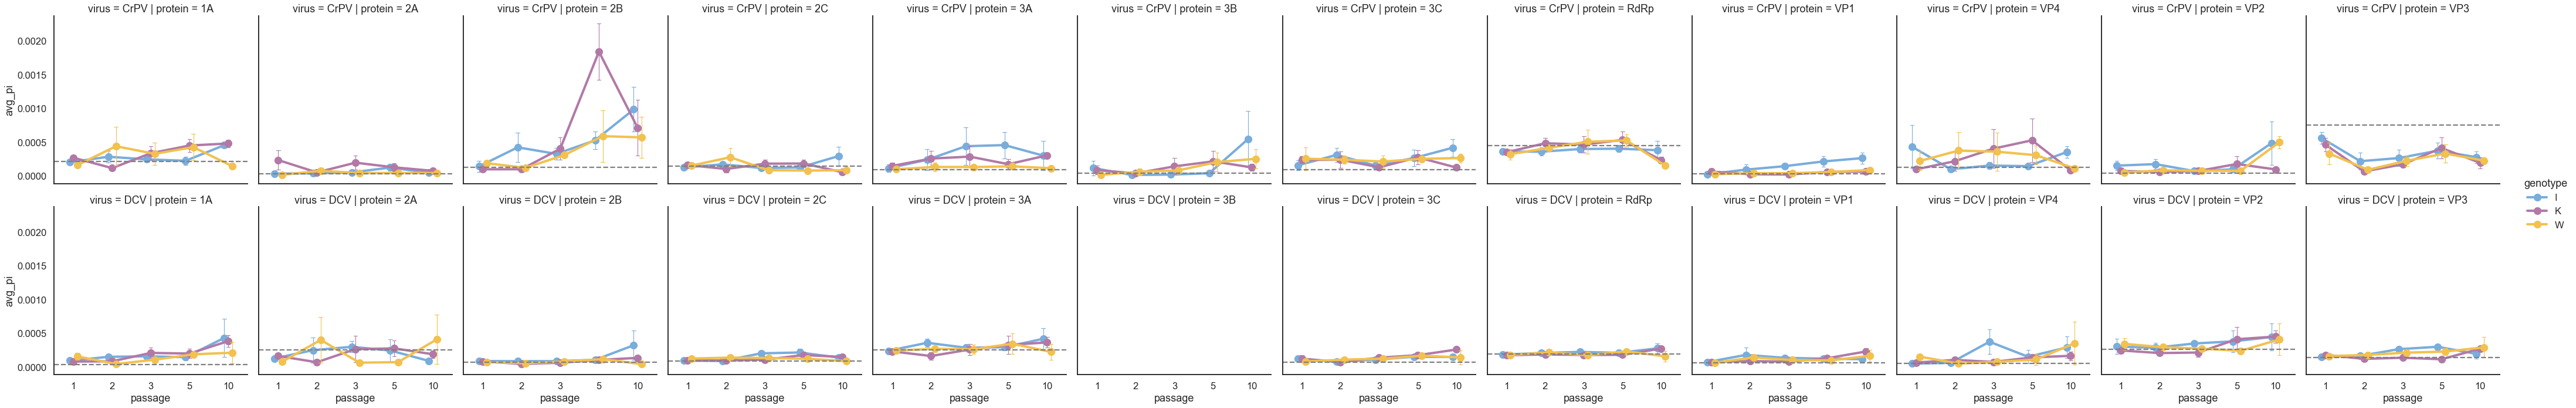

In [41]:
sns.set_context("talk") 
sns.set_style('white')


g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental') ], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                col='protein', 
                palette=our_color_palette, 
                col_order = proteins['CrPV'].keys(),
                #col_wrap=6, 
                row='virus',
                errwidth=1.1, 
                errorbar="se",
                  dodge=0.2,
                  capsize=0.1,
                kind='point')


# Add a horizontal line to each plot
df_p0 = df_pis_protein[df_pis_protein['genotype']=='parental']
for ax in g.axes.flat:
    protein = ax.title.get_text().split("= ")[-1] 
    virus = ax.title.get_text().split("= ")[1].split(" |")[0]
    if (virus == "DCV") & (protein=="3B"):
        print('nothing')
    else:
        pi_p0 = df_p0[(df_p0['protein']==protein) & (df_p0['virus']==virus)]['avg_pi'].values[0]
        ax.axhline(y=pi_p0, color='gray', linestyle='--')
        
g.figure.savefig(f"/Users/lfuhrmann/Downloads/diveristy_per_proteins.pdf")

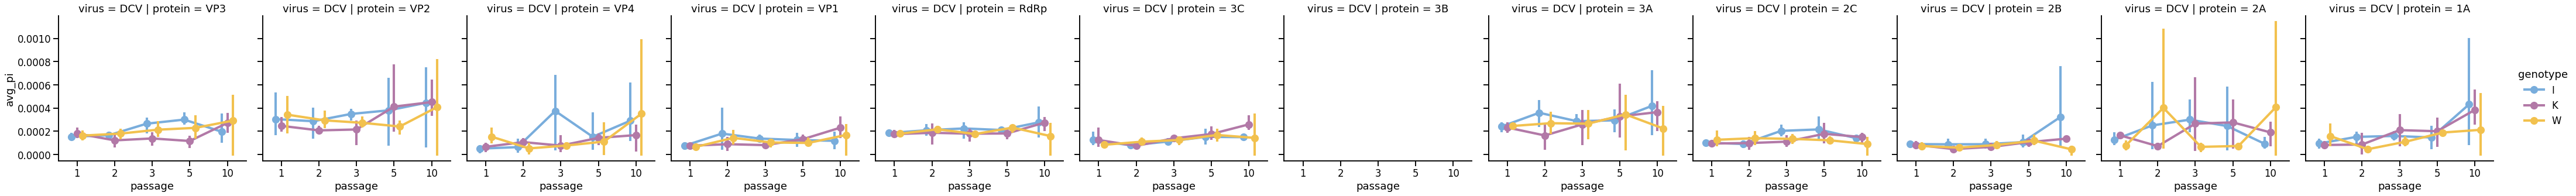

In [19]:
sns.set_context("talk") 


g = sns.catplot(df_pis_protein[df_pis_protein['genotype']!='parental'], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                row='virus', 
                row_order=['DCV'],
                col='protein', 
                dodge=0.3,
                palette=our_color_palette, 
                kind='point')

g.savefig("/Users/lfuhrmann/Downloads/nucleotide_diversity.proteins.pdf")

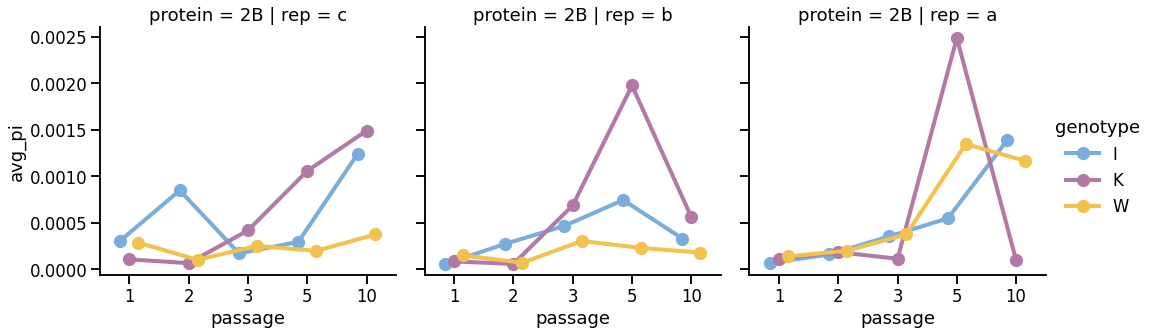

In [20]:
sns.set_context("talk") 


g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental') & (df_pis_protein['virus']=='CrPV') ], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                col='rep', 
                row='protein', 
                row_order=['2B'],
                dodge=0.3,
                palette=our_color_palette, 
                kind='point')

## test for diversity in CrPV protein 2B without D219N mutation

In [21]:
df_update = df[~df["site"].isin([1323, 1363])]

In [22]:
df_pis_protein = pd.DataFrame() 

for virus in ['CrPV']:
    for sample in df['passage'].unique():
        proteins_virus = proteins[virus]
        for protein in proteins_virus.items():
            protein_id = protein[0]
            protein_start = protein[1][0]
            protein_end = protein[1][1]
            protein_length = protein_end - protein_start

            df_temp = df_update[df_update['virus']== virus]
            df_temp = df_temp[df_temp['passage']==sample]
            df_temp = df_temp[df_temp['site'].isin(list(range(protein_start,protein_end+1 )))]
            avg_pi = df_temp['pi'].sum()/protein_length

            mean_pis = {
                        'virus': [virus], 
                        'sample': sample, 
                        'protein': protein_id,
                        'avg_pi': avg_pi, 
                    }

            df_pis_protein = pd.concat([pd.DataFrame(mean_pis),df_pis_protein], ignore_index=True)

In [23]:
df_pis_protein['genotype'] = df_pis_protein['sample'].str.split("_").str[0]
df_pis_protein['rep'] = df_pis_protein['sample'].str.split("_").str[-1]
df_pis_protein['passage'] = df_pis_protein['sample'].str.split("_").str[1].str.split("p").str[-1].astype(int)


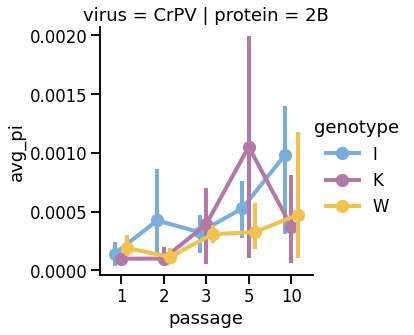

In [24]:
sns.set_context("talk") 


g = sns.catplot(df_pis_protein[df_pis_protein['genotype']!='parental'], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                row='virus', 
                row_order=['CrPV'],
                col='protein', 
                col_order=['2B'],
                dodge=0.3,
                palette=our_color_palette, 
                kind='point')

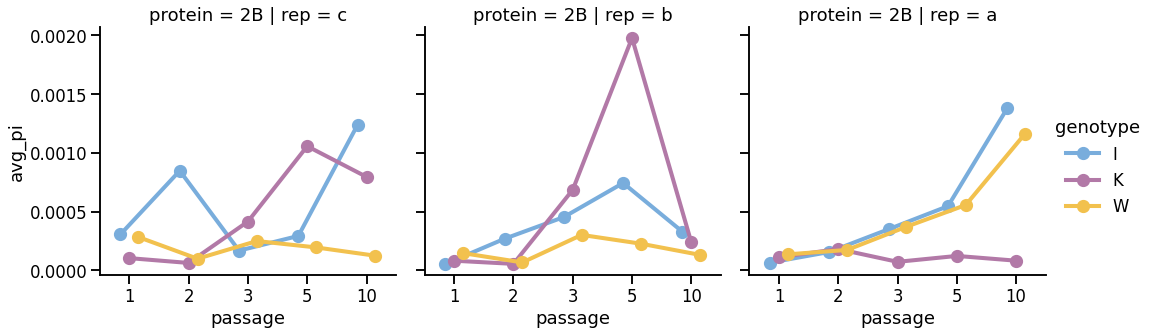

In [25]:
sns.set_context("talk") 


g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental') & (df_pis_protein['virus']=='CrPV') ], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                col='rep', 
                row='protein', 
                row_order=['2B'],
                dodge=0.3,
                palette=our_color_palette, 
                kind='point')